In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Mean of Charges: 13270.422265141257
Standard Deviation of Charges: 12110.011236694001


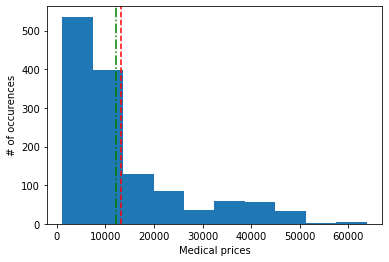

In [4]:
_ = plt.hist(medical.charges)
_ = plt.xlabel("Medical prices")
_ = plt.ylabel("# of occurences")
mean = np.mean(medical.charges)
std = np.std(medical.charges, ddof=1)
_ = plt.axvline(mean, color='r', linestyle='--')
_ = plt.axvline(std, color='g', linestyle='-.')
print("Mean of Charges:", mean)
print("Standard Deviation of Charges:", std)

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ In order to justify this data as representative we would have to take the logarithm of the skewed data and then conduct a 95% confidence interval and see if the logarithm of the mean of the sample lies within that range. The frequentist test to use would be taking random data points from the sample to create a distribution of the logarithmic means and 

In [5]:
def medical_log_sampler(n):
    return np.random.choice(np.log(medical.charges), n)

sampling_dist = [medical_log_sampler(50) for _ in range(365)]
distribution_mean = [np.mean(x) for x in sampling_dist]

sample_mean = np.mean(distribution_mean)
sample_std = np.std(np.log(medical.charges), ddof=1)

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__The administrator has to be fairly confident of the statistis in order to run his business so the confidence interval will be 95% to ensure 95% of the time the income is above the operational cost given randomness. A one-sided interval is sufficient because the administrator doesn't care if they are above their operational cost only if they are below. The administrator should be concerned because according to the sampling distribution the log of 12000 is outside of the 95% confidence interval of the random sampling, meaning the actual mean of the data is below 12000 with 95% confidence.   

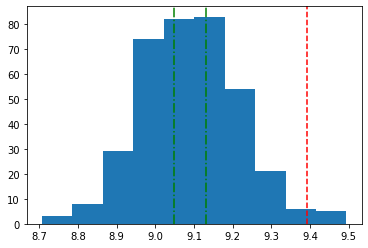

In [6]:
crit_val = norm.ppf(.95)
se = sample_std/np.sqrt(len(medical.charges))
margin_of_error = se * crit_val

upper = sample_mean + margin_of_error
lower = sample_mean - margin_of_error

_ = plt.hist(distribution_mean)
_ = plt.axvline(np.log(12000), color='r', linestyle='--')
_ = plt.axvline(upper, color='g', linestyle='-.')
_ = plt.axvline(lower, color='g', linestyle='-.')

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance and people without insurance get charged the same. The alternative hypothesis is that people with insurance get charged differently than people without insurance. The assumption we are making is that the two groups of insured and non_insured have the same variance, meaning that all the data points have close to equal distance from the average line. 

In [7]:
non_insured = medical[medical['insuranceclaim'] == 0].charges
insured = medical[medical['insuranceclaim'] == 1].charges

denominator = (len(non_insured) - 1)*np.std(non_insured)**2 + (len(insured) - 1)*np.std(insured)**2
numerator = len(non_insured) + len(insured) - 2

s_p = np.sqrt(denominator/numerator)
s_p

11512.282899205748

In [8]:
denominator = np.mean(non_insured) - np.mean(insured)
numerator = s_p * np.sqrt((1/len(non_insured)) + (1/len(insured)))

t = denominator/numerator
t
sci_t = stats.ttest_ind(non_insured, insured)[0]
print(t, "~=", sci_t)

-11.901306943555388 ~= -11.893299030876712


__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

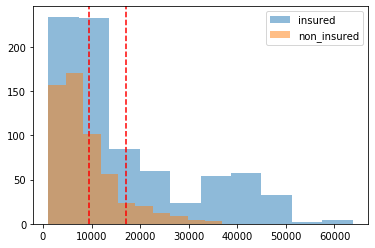

In [9]:
se = s_p/np.sqrt(len(medical.charges))
margin_of_error = se * t


upper = mean + margin_of_error
lower = mean - margin_of_error

_ = plt.hist(insured, alpha=0.5, label='insured')
_ = plt.hist(non_insured, alpha=0.5, label='non_insured')
_ = plt.axvline(upper, color='r', linestyle='--')
_ = plt.axvline(lower, color='r', linestyle='--')
_ = plt.legend(loc='upper right')

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [11]:
stats.ttest_ind?

In [12]:
stats.ttest_ind(non_insured, insured, equal_var=False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I can not find an equivalent equation for the z test statistic, maybe the t test is the only test statistic in the case of two samples. 